# INIT : import related modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("data1.txt",sep="\t")
data1

,Hours,GPA
0,4,1.80
1,8,2.26
2,7,2.14
3,5,1.42
4,5,2.16
...,...,...
195,8,1.82
196,8,1.64
197,7,1.74
198,8,1.74


In [3]:
data2 = pd.read_csv("data2.txt",sep="\t")
data2

,Debt,Television
0,81708,40
1,140400,15
2,228366,36
3,137176,37
4,99522,42
...,...,...
425,52126,17
426,169630,50
427,62294,31
428,232295,43


# Q1-1 : find confidence interval


### find sample mean, stdev, n, standard err etc

In [4]:
x_bar = data1["Hours"].mean()
stdev = data1["Hours"].std()
n = data1.shape[0]
x_bar, stdev, n

(7.15, 1.6465282494940405, 200)

In [5]:
# but if stdev for population is given. use that.
stdev = 1.65

In [6]:
se = stdev / np.sqrt(n)
se

0.11667261889578033

### get intervals

In [7]:
# 90%
k = 1.64
print("90% interval")
print(f"{x_bar - k*se} ~ {x_bar + k*se}")

90% interval
6.958656905010921 ~ 7.34134309498908


In [8]:
# 95%
k = 1.96
print("95% interval")
print(f"{x_bar - k*se} ~ {x_bar + k*se}")

95% interval
6.921321666964271 ~ 7.3786783330357295


In [9]:
# 99%
k = 2.58
print("99% interval")
print(f"{x_bar - k*se} ~ {x_bar + k*se}")

99% interval
6.848984643248887 ~ 7.451015356751114


---
# Q1_2 : Linear Regression using hours vs GPA

## Before Linear regression. simple z-test

### setup hypothesis
- H0 : avg = 6.5 
- H1 : avg != 6.5

### test_statistics(zscore)

In [10]:
# test statistics
Z = (x_bar - 6.5) / (se)
Z

5.571144336621287

In [11]:
area = sp.stats.norm.cdf(Z)
pval = (1-area)*2  # because of two-sided test
area, pval

(0.9999999873464223, 2.530715548232365e-08)

In [12]:
f"P value so low {pval} < 0.05. So, reject H0"

'P value so low 2.530715548232365e-08 < 0.05. So, reject H0'

## Linear Regression PartTime vs GPA

In [13]:
x1 = data1['Hours'].values
x_matrix1 = x1.reshape(-1,1)
y1 = data1['GPA'].values

coef1, intercept1, r_value1, p_value1, std_err1 = sp.stats.linregress(x1,y1)
coef1, intercept1, r_value1, p_value1, std_err1

(-0.15345319740500465,
 3.0907903614457837,
 -0.5748223091901548,
 5.541545980585219e-19,
 0.015524254202775294)

### get equation and plot

In [14]:
print("score:" , r_value1)
print("coef:",coef1)
print("intercept:",intercept1)

yhat1 = intercept1  + coef1*x_matrix1
eqn1 = "{:.2f} + {:.2f} x parttime".format(intercept1, coef1)
eqn1

score: -0.5748223091901548
coef: -0.15345319740500465
intercept: 3.0907903614457837


'3.09 + -0.15 x parttime'

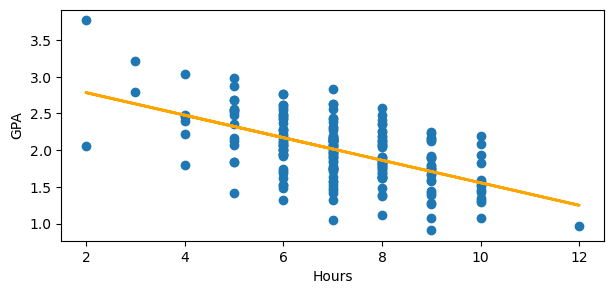

In [15]:
fig = plt.subplots(figsize=(7,3))
plt.scatter(x1,y1)
plt.plot(x1, yhat1, lw=2, c='orange')
plt.xlabel('Hours')
plt.ylabel('GPA')
plt.show()

### t - test for PartTime vs GPA


* H0 = not related (which means coef = 0)
* H1 = related   (which means coef != 0)

In [16]:
t_score1 = coef1/std_err1
t_score1

-9.884738770740535

In [17]:
f"P value so low {p_value1} < 0.05. So, reject H0"

'P value so low 5.541545980585219e-19 < 0.05. So, reject H0'

---
# Q2 Linear Regression Television vs Debt


### import data and process linear regression

In [18]:
x2 = data2["Television"].values
x_matrix2 = x2.reshape(-1,1)
y2 = data2["Debt"].values
coef2, intercept2, r_value2, p_value2, std_err2 = sp.stats.linregress(x2,y2)
coef2, intercept2, r_value2, p_value2, std_err2

(2581.790356453185,
 48039.67950188389,
 0.5539796117710312,
 5.9077856578049154e-36,
 187.54492741862177)

### print equation and graph

In [19]:

print("score:" , r_value2)
print("coef:",coef2)
print("intercept:",intercept2)

yhat2 = intercept2  + coef2*x_matrix2
eqn2 = "{:.2f} + {:.2f} x Television".format(intercept2, coef2)
eqn2

score: 0.5539796117710312
coef: 2581.790356453185
intercept: 48039.67950188389


'48039.68 + 2581.79 x Television'

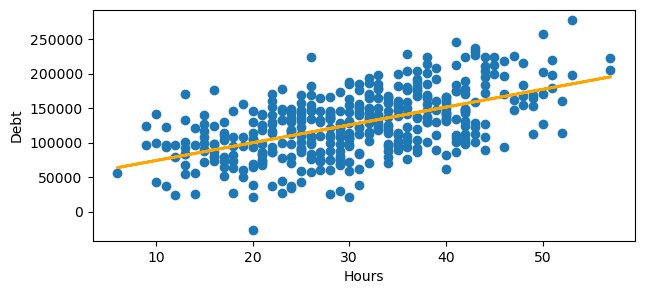

In [20]:
plt.subplots(figsize=(7,3))
plt.scatter(x2,y2)
plt.plot(x2, yhat2, lw=2, c='orange')
plt.xlabel('Hours')
plt.ylabel('Debt')
plt.show()

### t - test for Television vs Debt
* H0 = not related (which means coef = 0)
* H1 = related   (which means coef != 0)

In [21]:
t_score2 = coef2/std_err2
t_score2

13.766249996675905

In [22]:
f"P value so low {p_value2} < 0.05. So, reject H0"

'P value so low 5.9077856578049154e-36 < 0.05. So, reject H0'